In this notebook the aim is to explore what kinds of features each of ICA and PCA extracts from images. CIFAR-10 Dataset is used for that purpose.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import FastICA,PCA

In [2]:
data = np.load("cifar10.npy")

In [3]:
data.shape

(10000, 3072)

In [4]:
data[0].shape

(3072,)

In [5]:
def plotImg(x):
    fig, ax = plt.subplots(figsize=(4, 4))
    x = x.reshape((3, 32, 32))
    x = np.rollaxis(x, 0, 3)
    x = (x - x.min()) / x.ptp()
    img = ax.imshow(x, interpolation="none")
    ax.grid(False)
    ax.axis('off')
    fig.subplots_adjust(left=0, top=1, bottom = 0, right=1)

**Plotting first ten images **

We first explore some images from CIFAR-10 Dataset

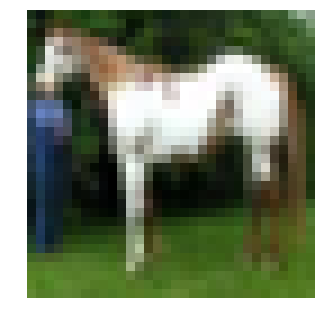

In [6]:
plotImg(data[0])

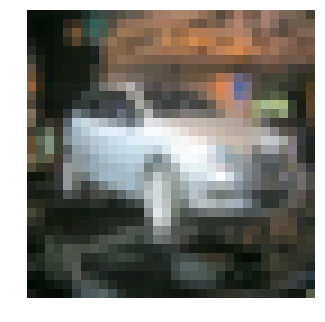

In [7]:
plotImg(data[1])

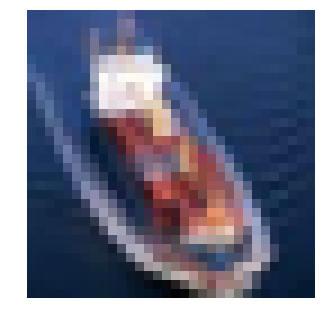

In [8]:
plotImg(data[2])

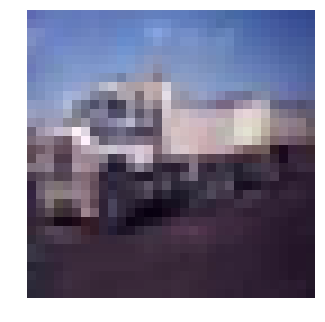

In [9]:
plotImg(data[3])

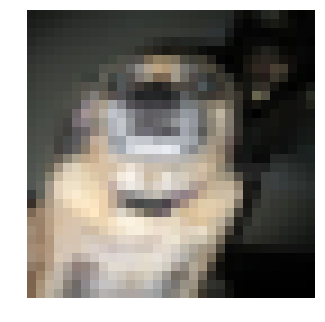

In [10]:
plotImg(data[4])

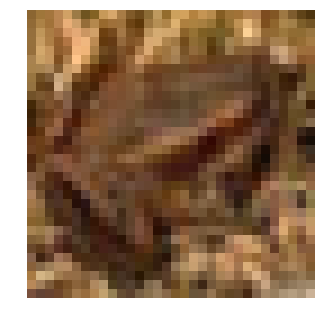

In [11]:
plotImg(data[5])

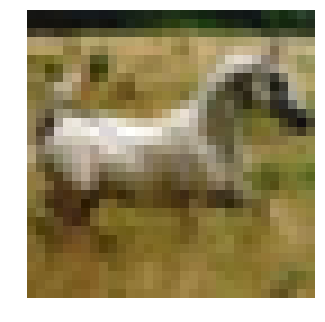

In [12]:
plotImg(data[6])

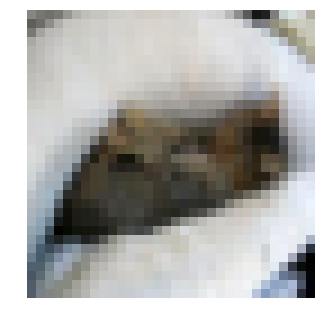

In [13]:
plotImg(data[7])

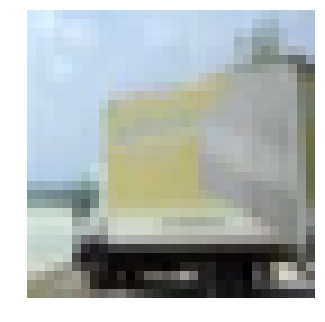

In [14]:
plotImg(data[8])

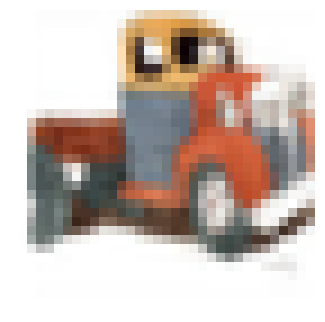

In [15]:
plotImg(data[9])

**PCA**

We now extract 100 principal components using PCA

In [16]:
pca=PCA(n_components=100)
pca.fit(data)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

We then store the U matrix 
which is of size [no.of principal components * no.of inputs features] i.e [100 ** 3072]

In [17]:
U_pca=pca.components_ #100 principal components [n_components * n_features]
U_pca.shape

(100, 3072)

Plotting the weights of the first 5 u vectors and last 5 

In [ ]:
plotImg(U_pca[0].T)

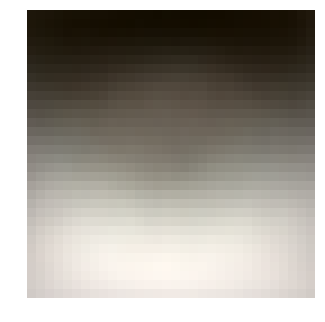

In [17]:
plotImg(U_pca[1])

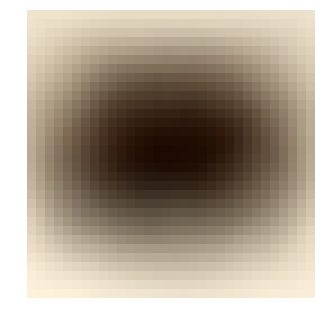

In [53]:
plotImg(U_pca[2])

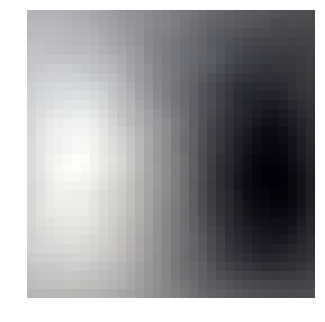

In [54]:
plotImg(U_pca[3])

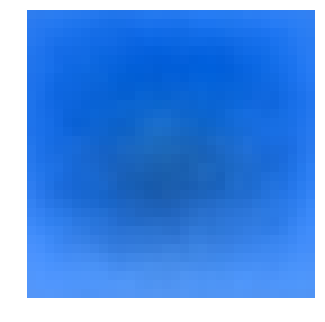

In [55]:
plotImg(U_pca[4])

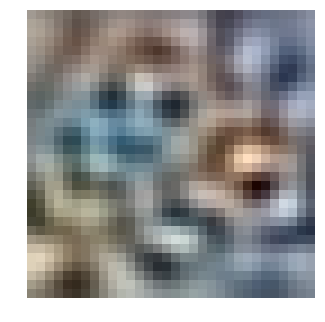

In [56]:
plotImg(U_pca[95])

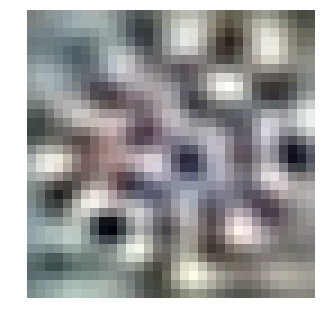

In [57]:
plotImg(U_pca[96])

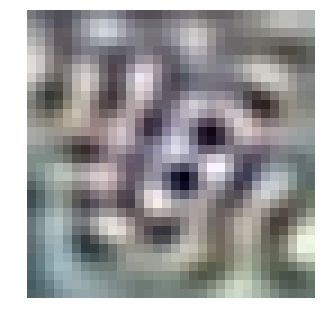

In [58]:
plotImg(U_pca[97])

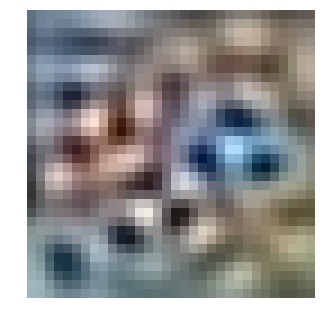

In [59]:
plotImg(U_pca[98])

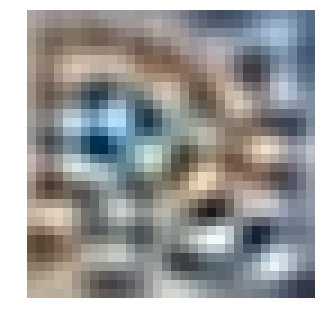

In [61]:
plotImg(U_pca[99])

**ICA**

Now we extract the independent components using ICA with Fast ICA algorithm

In [ ]:
ica=FastICA(n_components=100,max_iter=10000)
ica.fit(data)

And similarly as with PCA,We then store the U matrix 
which is of size [no.of independent components * no.of inputs features] i.e [100 ** 3072]

In [29]:
U_ica=ica.components_

In [30]:
U_ica.shape

(100, 3072)

Plotting the weights of the first 5 u vectors and last 5 

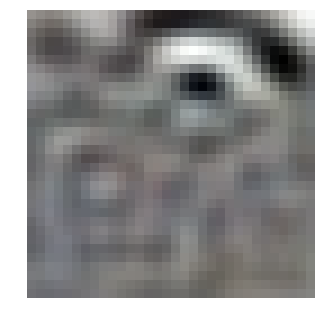

In [73]:
plotImg(U_ica[0])

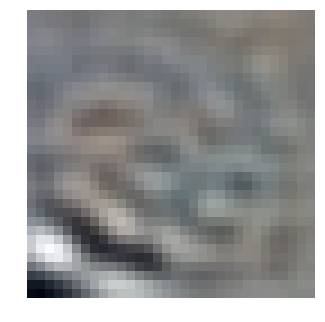

In [63]:
plotImg(U_ica[1])

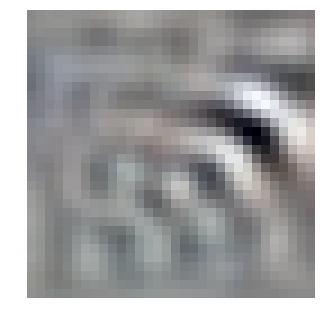

In [64]:
plotImg(U_ica[2])

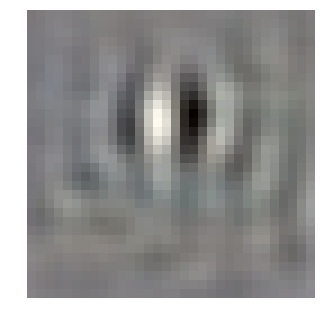

In [65]:
plotImg(U_ica[3])

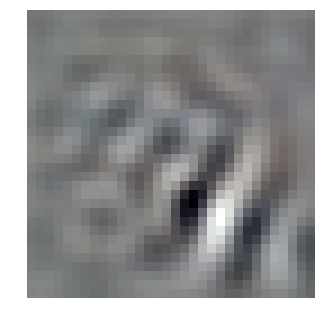

In [66]:
plotImg(U_ica[4])

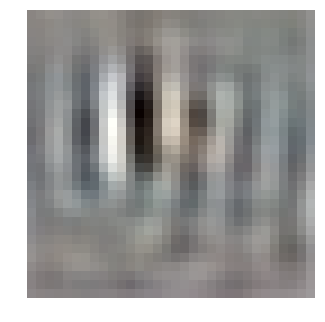

In [67]:
plotImg(U_ica[95])

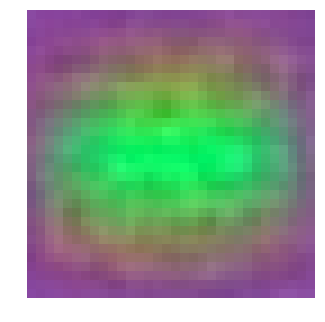

In [68]:
plotImg(U_ica[96])

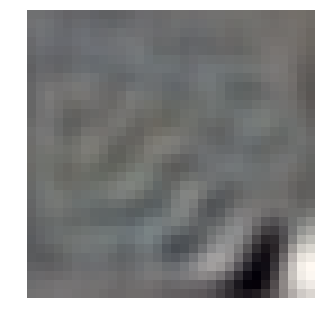

In [69]:
plotImg(U_ica[97])

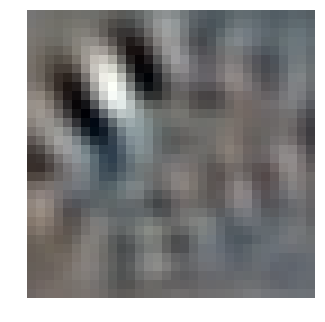

In [70]:
plotImg(U_ica[98])

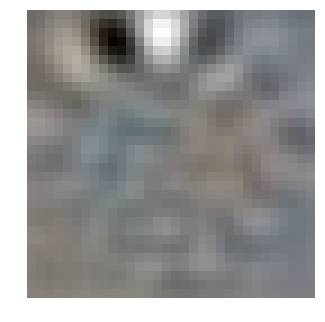

In [71]:
plotImg(U_ica[99])

# **Conclusion**

- PCA seems to capture global information from the images e.g brightness and color since it's principal components are in the directions of the maximal variance. ICA on the other hand decompose the image into a set of statistically independent components, they extract finer details from the images e.g edges. PCA is ideal if the goal is reconstruction of the original images.

- PCA sorts it's principal components descendingly by the variance (on the condition that the components are orthogonal to each other), The first few principal components capture features related to color and brightness, looking at the final few principal components we notice that we start to see some smaller details of images typically these are features with smaller variances so they are placed last by PCA and considered less important.

- For ICA however, this is not the case ICA only cares about extract statistically independent components with no mutual information between them and doesn't order features, all features seem to extract some small details from the images.